In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb
import anndata as ad
import pandas as pd

In [123]:
#adata_combined = sc.read_h5ad('I:\\mutiomics\\ICC\\mer')
adata_KOmerge=  sc.read_h5ad('I:\\mutiomics\\ICC\\KO_merge.h5ad')
adata_WTmerge=  sc.read_h5ad('I:\\mutiomics\\ICC\\WT_merge.h5ad')
adata_KO=  sc.read_h5ad('I:\\mutiomics\\ICC\\combined\\anndata_KO.h5ad')
adata_WT=  sc.read_h5ad('I:\\mutiomics\\ICC\\combined\\anndata_WT.h5ad')

In [144]:
adata_WTmerge.obs

,b_prime_label,a_label
0,2,2
1,2,1
2,3,1
3,3,2
4,2,2
...,...,...
9344,8,3
9345,8,3
9346,8,3
9347,8,3


In [126]:
adata_KOmerge.obs["combine_cluster"]=adata_KO.obs["combine_cluster"]

In [145]:
adata_WTmerge.obs["combine_cluster"]=adata_WT.obs["combine_cluster"]

In [127]:
adata_KOmerge.obs

,b_prime_label,a_label,combine_cluster
0,0,1,0
1,0,1,0
2,4,2,0
3,0,5,0
4,0,1,0
...,...,...,...
16605,2,3,7
16606,1,3,7
16607,1,3,7
16608,3,3,7


In [133]:
sc.tl.rank_genes_groups(adata_KOmerge, groupby='combine_cluster', method='wilcoxon')
marker_genes_df = sc.get.rank_genes_groups_df(adata_KOmerge, group=None)
marker_genes_df.to_csv("I:\\mutiomics\\ICC\\KO_combine_marker_genes_metabolites.csv", index=False)
#sc.pl.dotplot(adata_KO, ['Cdh5', 'Clec4f',"Spp1","Reln","Lyve1","Ly6g6d"], groupby='combine_cluster')

I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:455: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
I:\mutiomics\pythonProject\.venv\lib\site-p

In [116]:
marker_genes_df.to_csv("I:\\mutiomics\\ICC\\KO_combine_marker_genes_metabolites.csv", index=False)

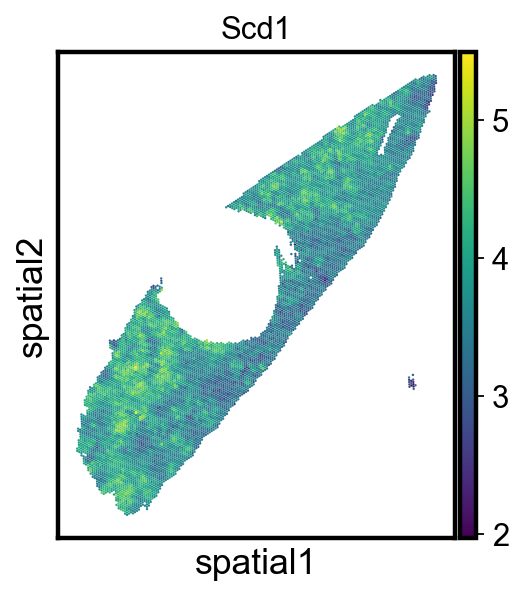

In [226]:
sc.pl.spatial(
    adata_WTmerge, 
    img_key="hires", 
    color="Scd1", 
    size=1, 
    groups=["0"], 
    alpha_img=0, 
    save="spatial_plot_Scd1_cluster0.png"  # Specify the file name and format
)

In [163]:
(adata_WTmerge.obs['combine_cluster'] == '4').sum()

206

In [11]:
import scanpy as sc

# Define the groups you want to plot
groups = ["0", "1", "2", "3", "4", "5", "6", "7"]

# Loop through each group and generate a spatial plot, saving each as a PDF
for group in groups:
    sc.pl.spatial(
        adata_WT, 
        img_key="hires", 
        color="combine_cluster", 
        size=1, 
        groups=[group], 
        show=False
    )
    # Save the figure as a PDF
    plt.savefig(f"I:\\mutiomics\\ICC\\combined\\KO_group_{group}.pdf")
    plt.close()  # Close the plot to avoid overlap in the next iteration


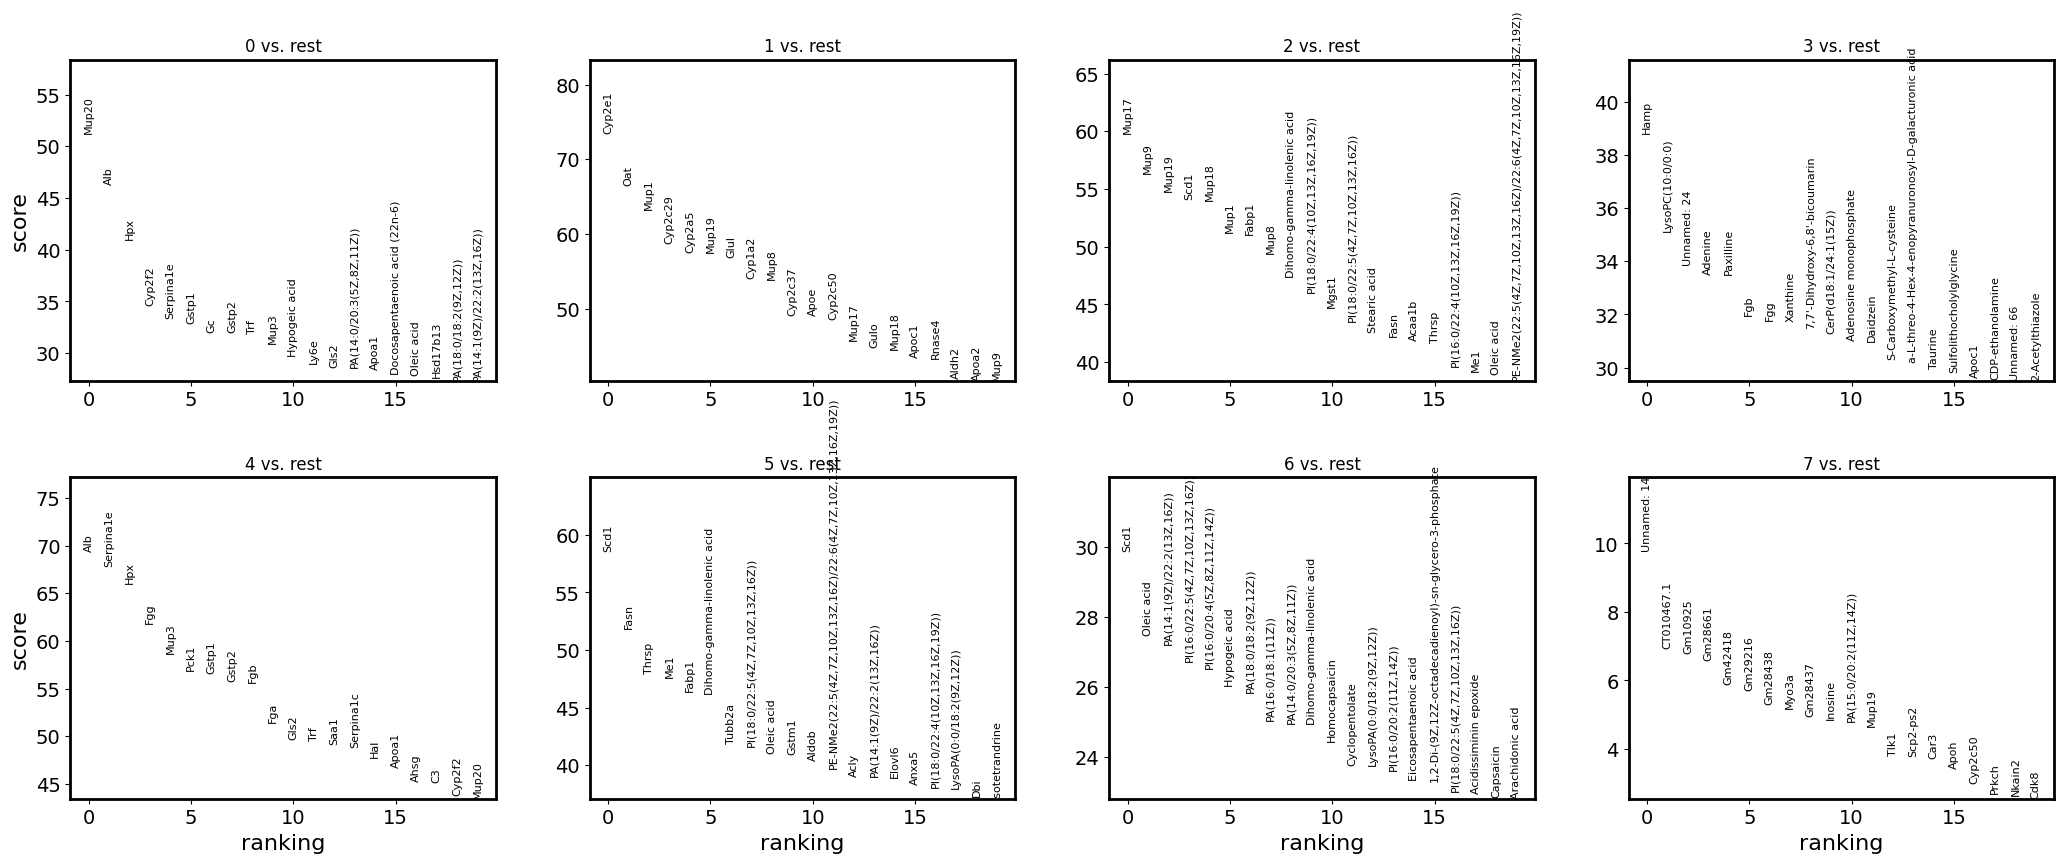

In [135]:
sc.pl.rank_genes_groups(adata_KOmerge, n_genes=20, sharey=False)


I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\plotting\_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\plotting\_anndata.py:907: UserWarning: The palette list has more values (20) than needed (7), which may not be intended.
  ax = sns.violinplot(


<Axes: xlabel='combine cluster', ylabel='Scd1'>

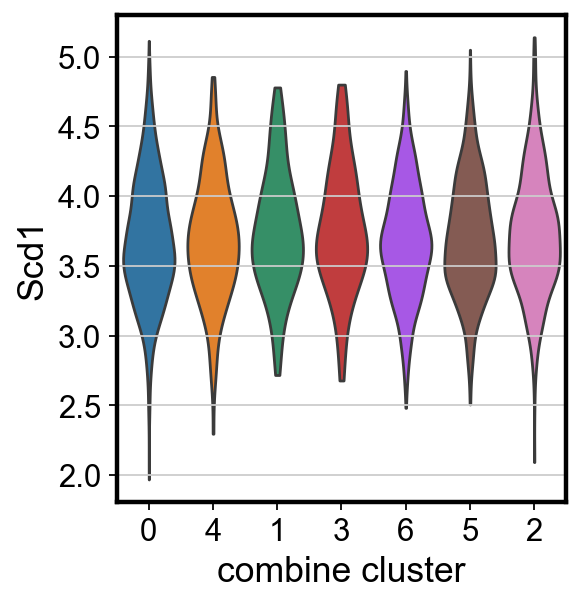

In [235]:
import scanpy as sc
import matplotlib.pyplot as plt

# Subset the data to exclude group 7
adata_filtered = adata_WTmerge[adata_WTmerge.obs['combine_cluster'] != '7'].copy()

# Reorder the categories in the 'combine_cluster' column
new_order = ['0', '4', '1', '3', '6', '5', '2']
adata_filtered.obs['combine_cluster'] = adata_filtered.obs['combine_cluster'].astype('category')
adata_filtered.obs['combine_cluster'] = adata_filtered.obs['combine_cluster'].cat.reorder_categories(new_order, ordered=True)

# Adjust matplotlib parameters for axis thickness and font size
plt.rcParams['axes.linewidth'] = 2  # Set axis thickness
plt.rcParams['xtick.labelsize'] = 14  # Set x-axis tick label size
plt.rcParams['ytick.labelsize'] = 14  # Set y-axis tick label size
plt.rcParams['axes.labelsize'] = 16  # Set axis label size

# Set font to a widely supported vector font
plt.rcParams['pdf.fonttype'] = 42  # Ensures that text is stored in the PDF as editable text

# Generate the violin plot
sc.pl.violin(
    adata_filtered, 
    ["Scd1"],
    groupby='combine_cluster', palette=sc.pl.palettes.default_20, stripplot=False,
    show=False  # Don't show the plot immediately
)

# Save the plot as a PDF with editable text
#plt.savefig("I:\\mutiomics\\ICC\\combined\\violin_plot_Cholangiomarkergene_combine.pdf")
#plt.close()  # Close the plot after saving


In [24]:
gene_names = adata_combined.var_names
# 筛选出所有以 "pad" 开头的基因
pad_genes = [gene for gene in gene_names if gene.startswith('Glu')]

# 打印出这些基因
print(pad_genes)

['Glud1', 'Glul']


In [173]:
(adata_combined.obs['condition'] == '0').sum()

1175

C:\Users\28123\AppData\Local\Temp\ipykernel_15944\3224937853.py:12: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_combined = adata_KO_cluster0.concatenate(adata_WT_cluster0, batch_key='condition')
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:453: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:452: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
I:\mutiomics\pythonProject\.venv\lib\site-packa

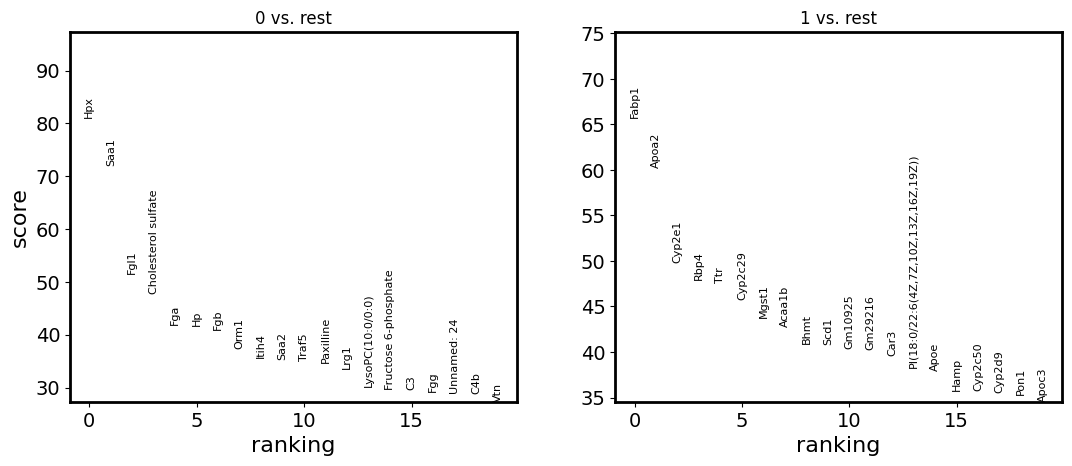

ModuleNotFoundError: No module named 'ace_tools'

In [148]:
import scanpy as sc

# Subset cluster 0 from both datasets
adata_KO_cluster0 = adata_KOmerge[adata_KOmerge.obs['combine_cluster'] == '0'].copy()
adata_WT_cluster0 = adata_WTmerge[adata_WTmerge.obs['combine_cluster'] == '0'].copy()

# Add a label to distinguish between the two conditions
adata_KO_cluster0.obs['condition'] = 'KO'
adata_WT_cluster0.obs['condition'] = 'WT'

# Concatenate the two datasets
adata_combined = adata_KO_cluster0.concatenate(adata_WT_cluster0, batch_key='condition')

# Perform differential expression analysis
sc.tl.rank_genes_groups(adata_combined, 'condition', method='t-test')  # You can use other methods like 'wilcoxon' or 'logreg'

# Visualize the results (e.g., top 20 genes)
sc.pl.rank_genes_groups(adata_combined, n_genes=20, sharey=False)

# Get the results in a DataFrame
deg_results = sc.get.rank_genes_groups_df(adata_combined, group='0')  # 'KO' vs 'WT'

import ace_tools as tools; tools.display_dataframe_to_user(name="Differentially Expressed Genes", dataframe=deg_results)


In [164]:
deg_results.to_csv("I:\\mutiomics\\ICC\\KO_cluste1_upregulated_gene_metabolite.csv", index=False)

In [152]:
import scanpy as sc

# Compute neighbors and embedding (e.g., UMAP)
sc.pp.normalize_total(adata_combined, inplace = True)
sc.pp.log1p(adata_combined)
sc.pp.highly_variable_genes(adata_combined, flavor='seurat', n_top_genes=2000, inplace=True)
sc.pp.pca(adata_combined, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata_combined,n_neighbors=50)
sc.tl.umap(adata_combined)

I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\preprocessing\_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         10.3.0
anyio                       NA
array_api_compat            1.6
arrow                       1.3.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          3.3.2
colorama                    0.4.6
comm                        0.2.2
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0.post0
debugpy                     1.8.1
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.2.1
executing                   2.0.1
fastjsonschema              NA
fontTools                   4.51.0
fqdn                        NA
h5py                        3.11.0
idna                        3.7
igraph                      0.11.4
ipykernel                   6.2

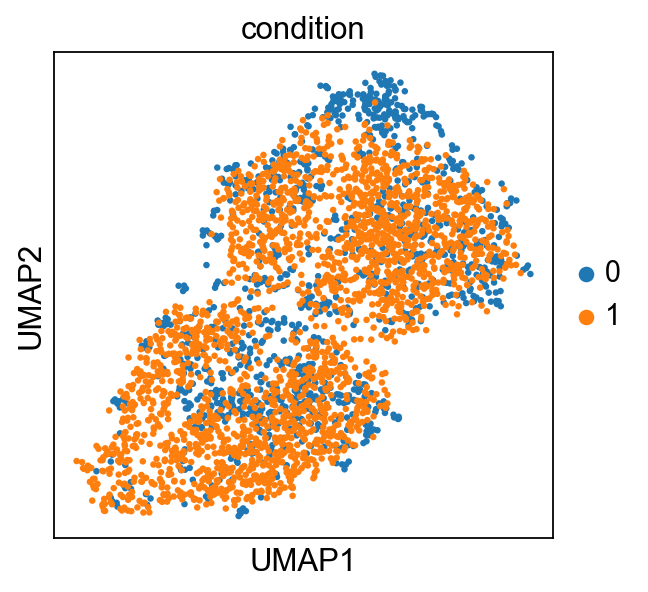

In [155]:
plt.rcParams['figure.figsize']=(8,8)
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)
sc.pl.umap(adata_combined, color='condition', palette=sc.pl.palettes.default_20)

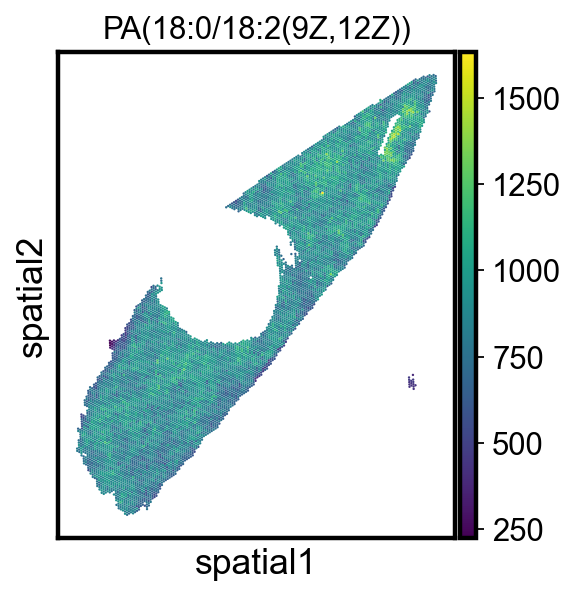

In [240]:
sc.pl.spatial(
    adata_WTmerge, 
    img_key="hires", 
    color="PA(18:0/18:2(9Z,12Z))", 
    size=1, 
    groups=["0"], 
    alpha_img=0, 
    save="spatial_plot_PA_cluster0.png"  # Specify the file name and format
)

I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\plotting\_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\plotting\_anndata.py:907: UserWarning: The palette list has more values (20) than needed (2), which may not be intended.
  ax = sns.violinplot(
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\plotting\_anndata.py:907: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
I:\mutiomics\pythonProject\.venv\lib\site-packages\scanpy\plotting\_anndata.py:907: UserWarning: The palette list has more values (20) than needed (2), which may not be intended.
  ax = sns.violinplot(
I:\mutiomics\pyt

[<Axes: xlabel='condition', ylabel='Palmitic acid'>,
 <Axes: xlabel='condition', ylabel='Scd1'>,
 <Axes: xlabel='condition', ylabel='Stearic acid'>,
 <Axes: xlabel='condition', ylabel='Oleic acid'>,
 <Axes: xlabel='condition', ylabel='PA(18:0/18:2(9Z,12Z))'>]

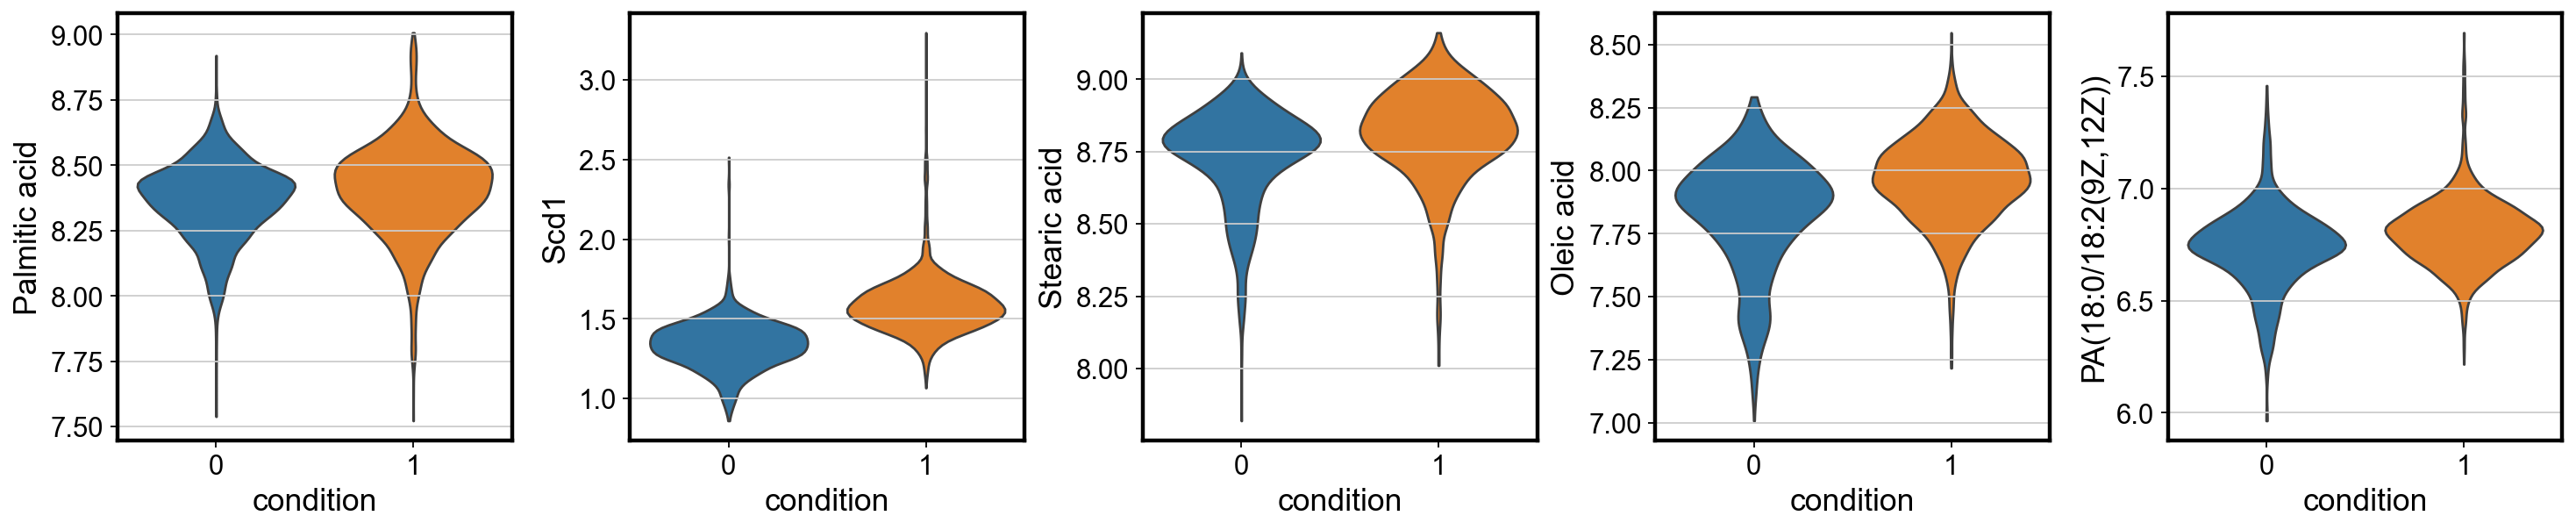

In [239]:
import scanpy as sc
import matplotlib.pyplot as plt



# Adjust matplotlib parameters for axis thickness and font size
plt.rcParams['axes.linewidth'] = 2  # Set axis thickness
plt.rcParams['xtick.labelsize'] = 14  # Set x-axis tick label size
plt.rcParams['ytick.labelsize'] = 14  # Set y-axis tick label size
plt.rcParams['axes.labelsize'] = 16  # Set axis label size

# Set font to a widely supported vector font
plt.rcParams['pdf.fonttype'] = 42  # Ensures that text is stored in the PDF as editable text

# Generate the violin plot
sc.pl.violin(
    adata_combined, 
    ["Palmitic acid","Scd1","Palmitic acid","Stearic acid","Oleic acid","PA(18:0/18:2(9Z,12Z))"],
    groupby='condition', palette=sc.pl.palettes.default_20, stripplot=False,
    show=False  # Don't show the plot immediately
)

#Save the plot as a PDF with editable text
#plt.savefig("I:\\mutiomics\\ICC\\combined\\scd1_wt.pdf")
#plt.close()  # Close the plot after saving


In [183]:
adata_combined.write("I:\\mutiomics\\ICC\\anndataKO_0_WT_1_clusteer.h5ad")

In [203]:
adata_WT_cluster0.X.shape

(2305, 17379)

In [204]:
correlation_matrix = np.corrcoef(adata_combined.X.T)

# Convert the correlation matrix to a DataFrame for easier interpretation
correlation_df = pd.DataFrame(correlation_matrix, 
                              index=adata_combined.var_names, 
                              columns=adata_combined.var_names)

I:\mutiomics\pythonProject\.venv\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
I:\mutiomics\pythonProject\.venv\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [211]:
column_name = 'Scd1'
sorted_column = correlation_df[column_name].sort_values(ascending=False)

# Convert the sorted column to a DataFrame for better visualization, including row names
sorted_column_df = pd.DataFrame(sorted_column).reset_index()
sorted_column_df.columns = ['Variable', 'Correlation']

In [212]:
sorted_column_df.to_csv("I:\\mutiomics\\ICC\\Scd1.csv", index=False)